In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_csv("Add_sales_data_2018.csv")
df.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [5]:
df.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [ ]:
df['total_spent'] = df['TV'] + df['radio'] + df['newspaper']
sns.scatterplot(data=df, x='total_spent', y='sales')

# . First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit
# generated

<AxesSubplot:xlabel='Profit(in Thousands)', ylabel='company'>

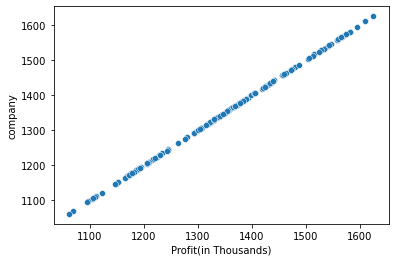

In [7]:
df['company']=df['Add1(in Thousands)']+df['Add2(in Thousands)']+df['Add3(in Thousands)']+df['Add4(in Thousands)']+df['Add5(in Thousands)']
sns.scatterplot(data=df,x='Profit(in Thousands)' ,y='company')

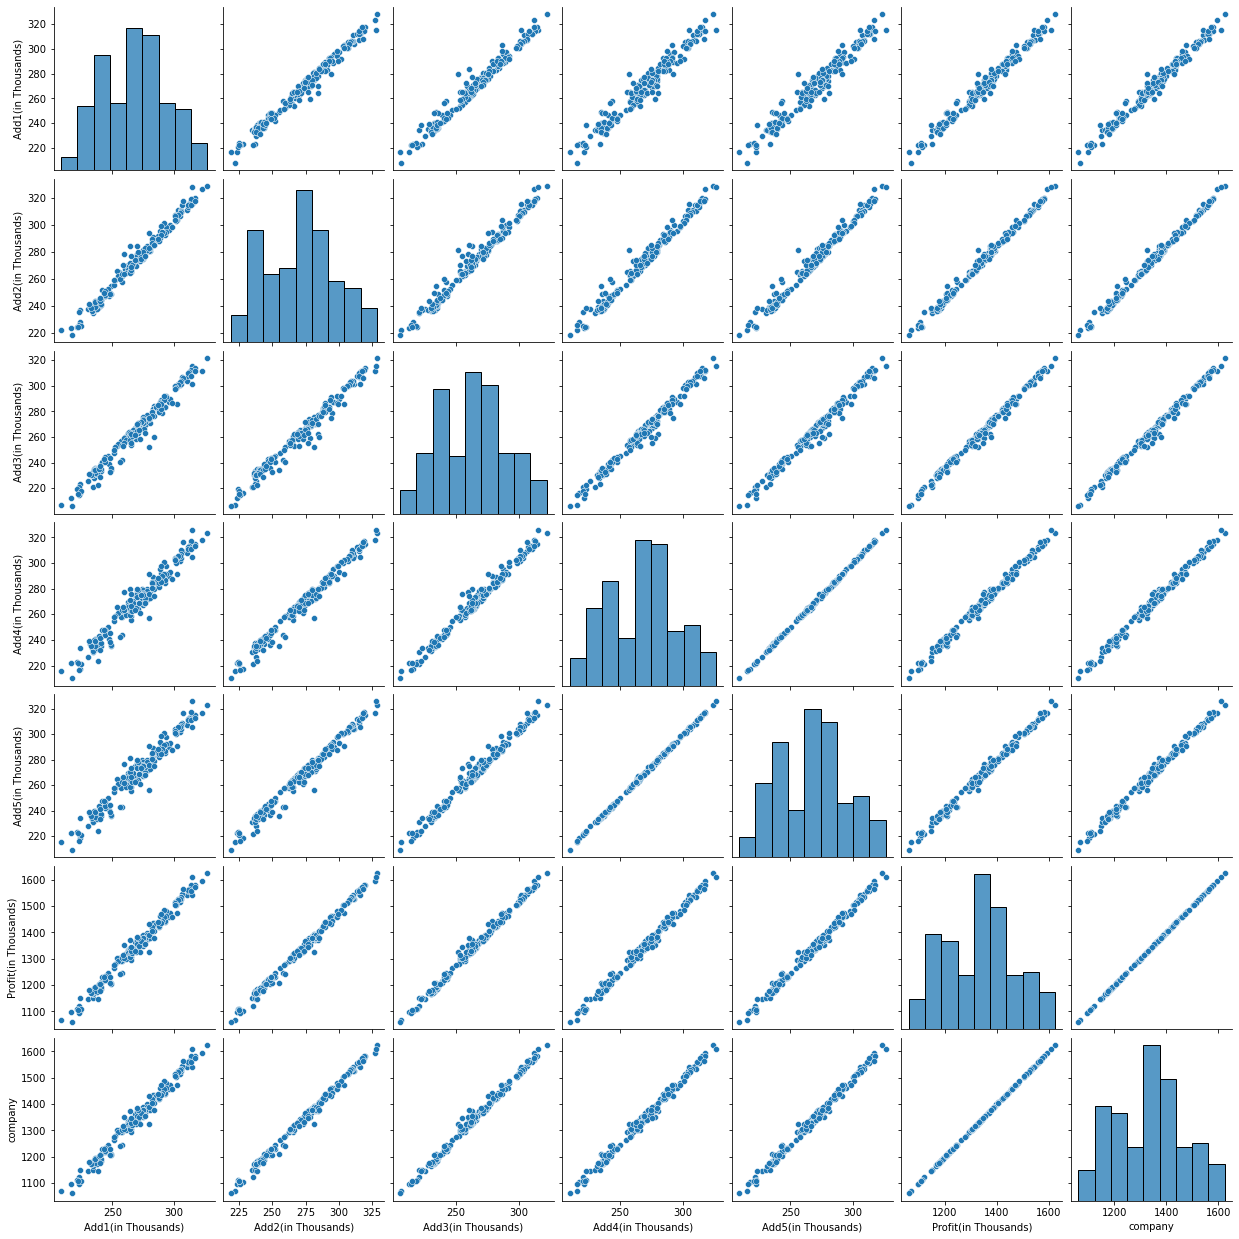

In [8]:
sns.pairplot(df)

# Build a regression model to predict the profit from the given data and 
# comment your findings on it.

In [13]:
x = df.drop(['Date','Profit(in Thousands)','company'], axis=1)
x

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands)
0,208.00,222.25,206.85,216.00,215.15
1,217.00,218.60,205.90,210.25,209.20
2,223.50,227.80,216.15,217.25,218.20
3,230.00,237.50,225.75,226.45,227.60
4,234.55,234.60,221.05,230.30,230.90
...,...,...,...,...,...
200,288.00,288.25,279.20,284.50,284.30
201,290.00,292.50,282.20,284.80,284.45
202,298.60,298.60,286.65,287.45,287.80
203,290.00,299.55,285.90,297.85,298.35


In [14]:
y=df['Profit(in Thousands)']
y

0      1068.25
1      1060.95
2      1102.90
3      1147.30
4      1151.40
        ...   
200    1424.25
201    1433.95
202    1459.10
203    1471.65
204    1439.00
Name: Profit(in Thousands), Length: 205, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=101)

In [17]:
from sklearn.linear_model  import LinearRegression

In [18]:
model = LinearRegression()

In [19]:
model.fit(X_train,y_train)

LinearRegression()

In [20]:
test_pred=model.predict(X_test)
test_pred

array([1374.3 , 1564.3 , 1610.1 , 1385.8 , 1479.85, 1458.65, 1276.05,
       1292.5 , 1186.35, 1183.45, 1349.4 , 1336.3 , 1342.45, 1341.  ,
       1372.9 , 1334.1 , 1294.65, 1540.35, 1223.85, 1280.15, 1171.4 ,
       1176.85, 1322.  , 1229.1 , 1441.65, 1205.75, 1204.75, 1404.5 ,
       1581.1 , 1356.25, 1173.  , 1245.05, 1433.95, 1102.9 , 1181.2 ,
       1486.5 , 1230.4 , 1188.15, 1326.1 , 1192.95, 1210.2 ])

In [21]:
from sklearn.metrics  import mean_absolute_error, mean_squared_error

<AxesSubplot:xlabel='Profit(in Thousands)', ylabel='Count'>

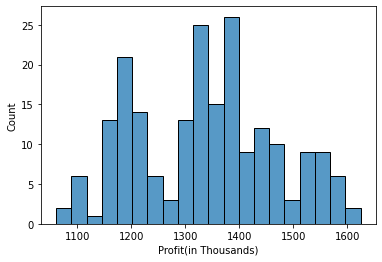

In [22]:
sns.histplot(data=df, x='Profit(in Thousands)', bins=20) #distribution of sales

In [27]:
test_residuals = y_test - test_pred
test_residuals

120   -2.273737e-13
185    0.000000e+00
180    2.273737e-13
119    0.000000e+00
109    2.273737e-13
104    0.000000e+00
133    0.000000e+00
89    -2.273737e-13
37    -4.547474e-13
34    -2.273737e-13
145    0.000000e+00
65    -2.273737e-13
78    -4.547474e-13
152    0.000000e+00
149    0.000000e+00
66    -2.273737e-13
85     0.000000e+00
173    0.000000e+00
31     0.000000e+00
91     0.000000e+00
42    -2.273737e-13
41    -2.273737e-13
153    0.000000e+00
54    -2.273737e-13
167    0.000000e+00
48     0.000000e+00
50    -2.273737e-13
158   -4.547474e-13
184    0.000000e+00
144    0.000000e+00
25    -2.273737e-13
55    -2.273737e-13
201    0.000000e+00
2      0.000000e+00
12    -2.273737e-13
197    0.000000e+00
96     0.000000e+00
22    -2.273737e-13
100    0.000000e+00
39    -2.273737e-13
32    -2.273737e-13
Name: Profit(in Thousands), dtype: float64

In [23]:
mean_absolute_error(y_test,test_pred)

1.2755108622425214e-13

In [24]:
mean_squared_error(y_test,test_pred)

3.656743561591128e-26

In [25]:
model.coef_

array([1., 1., 1., 1., 1.])

In [26]:
y_hat=model.predict(x)

# Predict the profit generated by the company, if they wish to spend the 
following amount for advertisement.


In [28]:
from joblib import dump,load #saving your file as a binary file

In [29]:
import os
model_dir = "models"
os.makedirs(model_dir, exist_ok=True)
filepath = os.path.join(model_dir, 'model.joblib')
dump(model, filepath)

['models\\model.joblib']

In [30]:
pwd

'C:\\Users\\Simi.Jacob\\OneDrive - EY\\IN\\Sagar sir shared\\ML_Live_Class-main'

In [31]:
load_model = load(r'C:\\Users\\Simi.Jacob\\OneDrive - EY\\IN\\Sagar sir shared\\ML_Live_Class-main\models\model.joblib')

In [32]:
load_model.coef_

array([1., 1., 1., 1., 1.])

In [33]:
example=[[290,312,309,298,320]]

In [35]:
load_model.predict(example)

array([1529.])